# __Milestone 1: Business Understanding__

## Problem Statement

Predict whether customers are likely to churn based on their past behaviour and demographics. 

## Data identification

In order for us to build a machine learning algorithm to predict customer churning, we will need a combination of features capturing the customer's interactions with our service as well as customer demographic information. Features that we will be uitilizing in our machine learning model will include:

 - CustomerID
 - Gender
 - Age
 - Income
 - TotalPurchase
 - NumOfPurchases
 - Location
 - MaritalStatus
 - Education
 - SubscriptionPlan
 - Churn (label)

## Hypothesis 

## Collect and clean the data

We have collected raw data based on the desired features and target attributes for our churn prediction model. This raw data has been stored in the train.csv file in our data folder. We will now import this data into a dataframe and start cleaning the data.

### Import

In [1]:
# Supress warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import pandas as pd # data wrangling
import seaborn as sns # data visualization
import plotly.express as px
import matplotlib.pyplot as plt

# for cat features
from category_encoders import OneHotEncoder

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline

from skimpy import clean_columns

In [2]:
df = pd.read_csv('./data/train.csv') #reading the data from the csv file to our dataframe
df.head() #display the first few data entries as well as column headings

,CustomerID,Gender,Age,Income,TotalPurchase,NumOfPurchases,Location,MaritalStatus,Education,SubscriptionPlan,Churn
0,1,NaN,35,52850.0,1500,6.0,Urban,Married,Bachelor's,Gold,Yes
1,2,Female,25,29500.0,800,3.0,Suburban,NaN,High School,Bronze,No
2,3,Male,45,73500.0,2000,8.0,Rural,Married,Master's,Silver,No
3,4,Female,30,NaN,1200,5.0,Urban,Single,Bachelor's,Bronze,No
4,5,Male,55,80400.0,2500,9.0,Suburban,Married,PhD,Gold,No


We notice that our raw data has 10 features as well as a target feature called Churn. This data is not yet ready to be modelled and needs to be cleaned and prepared.

### Preprocessing data

__Removing irrelevent features__

As we will not need to know the customer ID to determine if they will churn or not, it is not a relevent feature for machine learning modelling and can therefor be dropped.

In [3]:
#removing the irrelevent feature
df.drop(
    columns='CustomerID',
    inplace=True
)

df.head() #inspecting the dataframe without the irrelevent feature

,Gender,Age,Income,TotalPurchase,NumOfPurchases,Location,MaritalStatus,Education,SubscriptionPlan,Churn
0,NaN,35,52850.0,1500,6.0,Urban,Married,Bachelor's,Gold,Yes
1,Female,25,29500.0,800,3.0,Suburban,NaN,High School,Bronze,No
2,Male,45,73500.0,2000,8.0,Rural,Married,Master's,Silver,No
3,Female,30,NaN,1200,5.0,Urban,Single,Bachelor's,Bronze,No
4,Male,55,80400.0,2500,9.0,Suburban,Married,PhD,Gold,No


__Changing the target, Churn, to numeric values__

We want to convert the target data type from string values to integer values for more accurate machine learning modelling.

In [4]:
# Replacing the yes and no values with 1 and 0
df['Churn'].replace(
    {'Yes': 1, 'No': 0},
    inplace= True
)

df['Churn']

0      1
1      0
2      0
3      0
4      0
      ..
355    1
356    0
357    1
358    1
359    0
Name: Churn, Length: 360, dtype: int64

We have now converted the Churn datatype to int.

__Data profiling__

We will make use of the skimpy library to create a summary of desired data information.

In [5]:
import skimpy as sk #importing the skimpy library

sk.skim(df) #create a summary of df information

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 360    │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 10     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Age               │   0 │      0 │      37 │     10 │     19 │     28 │     36 │     45 │     57 │ ▇▆▇▇▅▅  │  │
│ │ Income            │   3 │   0.83 │   54000 │  19000 │  20000 │  35000 │  54000 │  72000 │  88000 │ ▇▆▇▆▇▇  │  │
│ │ TotalPurchase     │   0 │      0 │    1600 │    590 │    500 │   1000 │   1600 │   2100 │   2700 │ ▆▆▇▆▇▅  │  │
│ │ NumOfPurchases    │   4 │   1.11 │       6 │    2.1 │      2 │      4 │      6 │      8 │      9 │ ▅▅▃▃▅▇  │  │
│ │ Churn             │   0 │      0 │     0.3 │   0.46 │      0 │      0 │      0 │      1 │      1 │ ▇    ▃  │  │
│ └───────────────────┴─────┴────────┴─────────┴────────┴────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                           │      5 │      1.39 │                       0.99 │                   355 │  │
│ │ Location                         │      4 │      1.11 │                       0.99 │                   356 │  │
│ │ MaritalStatus                    │      5 │      1.39 │                       0.99 │                   355 │  │
│ │ Education                        │      0 │         0 │                        1.1 │                   404 │  │
│ │ SubscriptionPlan                 │      0 │         0 │                          1 │                   360 │  │
│ └──────────────────────────────────┴────────┴───────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Some key takeaways of this skimpy summary is that we have now have 5 numeric features(including the target), and 5 categorical features. We also notice that there are missing values for the features Income, NumOfPurchases, Gender, Location, and MaritalStatus. We will need to handle these missing features.

__Handling missing values__

In [6]:
num_col = ['Income','NumOfPurchases'] #creating a list of the numeric features with missing values
cat_col = ['Gender','Location','MaritalStatus'] #creating a list of categorical features with missing values

for col1 in num_col: #for each of the columns in the list replace the missing values with the mean of the column
    df[col1].fillna(
        df[col1]
        .dropna()
        .mean(),
        inplace= True
    )

for col2 in cat_col:
    df[col2].fillna( #replace the missing categorical values with the mode of the feature
        df[col2]
        .mode()[0],
        inplace= True
    )

df.isnull().sum()


Gender              0
Age                 0
Income              0
TotalPurchase       0
NumOfPurchases      0
Location            0
MaritalStatus       0
Education           0
SubscriptionPlan    0
Churn               0
dtype: int64

In [7]:
df.head()

,Gender,Age,Income,TotalPurchase,NumOfPurchases,Location,MaritalStatus,Education,SubscriptionPlan,Churn
0,Female,35,52850.000000,1500,6.0,Urban,Married,Bachelor's,Gold,1
1,Female,25,29500.000000,800,3.0,Suburban,Married,High School,Bronze,0
2,Male,45,73500.000000,2000,8.0,Rural,Married,Master's,Silver,0
3,Female,30,54273.529412,1200,5.0,Urban,Single,Bachelor's,Bronze,0
4,Male,55,80400.000000,2500,9.0,Suburban,Married,PhD,Gold,0


We now have no missing values in our dataframe.

__Checking the cardinality of categorical features__

In [8]:
df.select_dtypes('object').nunique()

Gender              2
Location            3
MaritalStatus       2
Education           4
SubscriptionPlan    3
dtype: int64

As our categorical features don't have very low or very high cardinality, we do not have to handle any feature cardinality.

__High collinearity__

We will now inspect the correlation between the features to detect any cases of high collinearity.

In [9]:
corr_df = df.select_dtypes('number').corr()
corr_df

,Age,Income,TotalPurchase,NumOfPurchases,Churn
Age,1.000000,0.989016,0.991159,0.973570,-0.578108
Income,0.989016,1.000000,0.996362,0.979777,-0.576808
TotalPurchase,0.991159,0.996362,1.000000,0.980369,-0.569293
NumOfPurchases,0.973570,0.979777,0.980369,1.000000,-0.543626
Churn,-0.578108,-0.576808,-0.569293,-0.543626,1.000000


In [10]:
fig = px.imshow(corr_df, color_continuous_scale='Spectral')
fig.update_layout(title='Heat Map: Correlation of Features', font=dict(size=12))
fig.show()

We notice that the highest collinearity is between TotalPurchase, Income, Age, and NumOfPurchases. As Income, TotalPurchase, and NumOfPurchases of the customer are important for churn predicitons, we can look at removing the Age feature for better model accuracy.

In [11]:
#dropping feature with high collinearity
df.drop(
    columns= 'Age',
    inplace= True
)

df.head()

,Gender,Income,TotalPurchase,NumOfPurchases,Location,MaritalStatus,Education,SubscriptionPlan,Churn
0,Female,52850.000000,1500,6.0,Urban,Married,Bachelor's,Gold,1
1,Female,29500.000000,800,3.0,Suburban,Married,High School,Bronze,0
2,Male,73500.000000,2000,8.0,Rural,Married,Master's,Silver,0
3,Female,54273.529412,1200,5.0,Urban,Single,Bachelor's,Bronze,0
4,Male,80400.000000,2500,9.0,Suburban,Married,PhD,Gold,0


## Storing the prepared data

__Creating a prepare data function__

We will now combine our data preparation code into a single function which will return a dataframe of prepared data ready for modelling.

In [12]:
def prepare_data(path): #declaring the function with paramater path which will be the file directory of the raw data
    prep_df = pd.read_csv(path) #reading the raw data from the path into a dataframe

    #removing the irrelevent feature
    prep_df.drop(
        columns='CustomerID',
        inplace=True
    )

    # Replacing the yes and no values with 1 and 0
    prep_df['Churn'].replace(
        {'Yes': 1, 'No': 0},
        inplace= True
    )

    num_col = ['Income','NumOfPurchases'] #creating a list of the numeric features with missing values
    cat_col = ['Gender','Location','MaritalStatus'] #creating a list of categorical features with missing values

    for col in num_col: #for each of the columns in the list replace the missing values with the mean of the column
        prep_df[col].fillna(
            prep_df[col]
            .dropna()
            .mean(),
            inplace= True
        )

    for col1 in cat_col:
        prep_df[col1].fillna( #replace the missing categorical values with the mode of the feature
            prep_df[col1]
            .mode()[0],
            inplace= True
        )

    prep_df.drop(
        columns= 'Age',
        inplace= True
    )

    return clean_columns(prep_df)

__Calling the prepare_data function__

In [13]:
prepared_df = prepare_data('./data/train.csv')
prepared_df.to_csv('./data/prepared_data.csv')

# __Milestone 2: Machine Learning Model Implementation__

## Data exploration

We will now explore our prepared data to gain more insights into their meaning and behaviour.

### Univariate analysis

We will start our analysis by looking at the state and behaviour of our target, Churn.

In [14]:
# Prepare data to display
labels = (
    prepared_df['churn']
    .astype('str')
    .str.replace('0','No', regex=True)
    .str.replace('1','Yes', regex=True)
    .value_counts()
)

# Create figure using Plotly
fig = px.bar(
    data_frame=labels, 
    x=labels.index, 
    y=labels.values, 
    title=f'Class Imbalance', 
    color=labels.index
)

# Add titles & Display figure
fig.update_layout(xaxis_title='Churn', yaxis_title='Number of Customers')
fig.show()

For business purposes, we want to focus on the customers that do churn. It is clear in this graph that the amount of customers that have churned is quite significant and the business would like to reduce this number.

### Bivariate/Multi-variate analysis

__Numeric Features__

We will now visualise the relationships of the numeric features against our target to understand their behaviour and impact.

In [15]:
plot_cols = ['income','total_purchase','num_of_purchases']

# Plot numeric features against target
plt.Figure(figsize=(3,4))
for col in plot_cols:
    fig = px.box(data_frame=prepared_df[plot_cols], x=col, color=prepared_df['churn'], title=f'BoxPlot for {col} Feature against the Target')
    fig.update_layout(xaxis_title=f'{col} Feature')
    fig.show()

After handling the outliers we concluded the following:

 - Customers with lower income is more likely to churn

 - Customers with lower total purchase amounts are churning

 - Customers with lower number of purchases are also churning

__Categorical features__

In [16]:
plot_columns = ['gender','location','marital_status','education','subscription_plan']
for plot in plot_columns:
    new_df = pd.DataFrame(
        prepared_df[[plot, 'churn']]
        .groupby(['churn'])
        .value_counts()
        .reset_index()
    )

    # Plot Category feature vs label
    fig = px.bar(
        data_frame=new_df, 
        x=plot, 
        y='count', 
        facet_col='churn', 
        color=new_df['churn'].astype(str), # convert it to string to avoid continuous scale on legend
        title=f'{plot} vs Target'
    )

    fig.update_layout(xaxis_title=plot, yaxis_title='Number of Customers')
    fig.show()

Focussing on the the customers that do churn we notice from the graphs that:
 - More females are churning
 - Customers from urban areas are churning the most
 - More single customers are churning
 - Customers with bachelor's degrees are churning the most
 - Bronze level subscription plan customers are the ones that churn the most

## Model Evaluation

### Importing necessary libraries

In [18]:
import numpy as np
import joblib
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from xgboost import XGBClassifier

accuracy_scores = []
precisions = []
f1_scores = []
recalls = []
mae_scores = []

### Label encoding data

In [19]:
label_encoder = LabelEncoder()

prepared_df['gender'] = label_encoder.fit_transform(prepared_df['gender'])
prepared_df['location'] = label_encoder.fit_transform(prepared_df['location'])
prepared_df['marital_status'] = label_encoder.fit_transform(prepared_df['marital_status'])
prepared_df['education'] = label_encoder.fit_transform(prepared_df['education'])
prepared_df['subscription_plan'] = label_encoder.fit_transform(prepared_df['subscription_plan'])
prepared_df

,gender,income,total_purchase,num_of_purchases,location,marital_status,education,subscription_plan,churn
0,0,52850.000000,1500,6.00000,2,0,0,1,1
1,0,29500.000000,800,3.00000,1,0,1,0,0
2,1,73500.000000,2000,8.00000,0,0,2,2,0
3,0,54273.529412,1200,5.00000,2,1,0,0,0
4,1,80400.000000,2500,9.00000,1,0,3,1,0
...,...,...,...,...,...,...,...,...,...
355,0,26000.000000,750,5.97191,0,1,1,0,1
356,1,71000.000000,2100,8.00000,1,0,0,1,0
357,0,31000.000000,900,4.00000,0,1,0,0,1
358,1,51000.000000,1500,6.00000,2,0,0,2,1


### Splitting the data

In [20]:
target = 'churn'
x = prepared_df.drop(columns=[target], inplace=False)
y = prepared_df[target]

x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size=0.4, random_state=42)

print(
    f'Training dataset \
    \nx_Train: {x_Train.shape[0]/len(x)*100:.0f}% \ny_Train: {y_Train.shape[0]/len(x)*100:.0f}% \
    \n\nValidation dataset \
    \nx_Val: {x_Test.shape[0]/len(x)*100:.0f}% \ny_Val: {y_Test.shape[0]/len(x)*100:.0f}%'
)

Training dataset     
x_Train: 60% 
y_Train: 60%     

Validation dataset     
x_Val: 40% 
y_Val: 40%


### Base accuracy

In [21]:
accuracy_Base = y_Train.value_counts(normalize=True).max()

print("Baseline Accuracy:", round(accuracy_Base, 2))

Baseline Accuracy: 0.71


### Linear Regression model

In [22]:
# Encode, build, and fit model
lin_model = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
lin_model.fit(x_Train, y_Train)

# Train model
y_test_lin_prob = lin_model.predict(x_Test)
y_test_lin_pred = (y_test_lin_prob > 0.5).astype(int)

# Populate evaluation metrics
accuracy_scores.append(round(accuracy_score(y_Test, y_test_lin_pred),4)), 
precisions.append(round(precision_score(y_Test, y_test_lin_pred),4)), 
recalls.append(round(recall_score(y_Test, y_test_lin_pred),4)), 
f1_scores.append(round(f1_score(y_Test, y_test_lin_pred),4))
mae_scores.append(round(mean_absolute_error(y_Test,y_test_lin_pred),4))

### Logistic Regression model

In [23]:
# Encode, build, and fit model
log_Model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=10000)
)
log_Model.fit(x_Train, y_Train)

# Train model
y_test_log_pred = log_Model.predict(x_Test)

# Populate evaluation metrics
accuracy_scores.append(round(accuracy_score(y_Test, y_test_log_pred),4)), 
precisions.append(round(precision_score(y_Test, y_test_log_pred),4)), 
recalls.append(round(recall_score(y_Test, y_test_log_pred),4)), 
f1_scores.append(round(f1_score(y_Test, y_test_log_pred),4))
mae_scores.append(round(mean_absolute_error(y_Test,y_test_log_pred),4))

### Decision Tree model

In [24]:
tree_hyperparam = range(1, 8)

# List of scores for visualization
train_Scores = []
test_Scores = []

for i in tree_hyperparam:
    # Encode, build, and fit model
    tree_Model = make_pipeline(
        StandardScaler(),
        DecisionTreeClassifier(max_depth=i, random_state=42)
    )
    tree_Model.fit(x_Train, y_Train)
    
    # Training accuracy score
    train_Scores.append(tree_Model.score(x_Train, y_Train))
    
    # Testing accuracy score
    test_Scores.append(tree_Model.score(x_Test, y_Test))

tune_data = pd.DataFrame(
    data = {'Training': train_Scores, 'Testing': test_Scores}, 
    index=tree_hyperparam
)

fig = px.line(
    data_frame=tune_data, 
    x=tree_hyperparam, 
    y=['Training', 'Testing'], 
    title="Decision Tree model training & testing curves"
)
fig.update_layout(xaxis_title ="Maximum Depth", yaxis_title="Accuracy Score")
fig.show()

y_test_tree_pred = tree_Model.predict(x_Test)

accuracy_scores.append(round(accuracy_score(y_Test, y_test_tree_pred),4)), 
precisions.append(round(precision_score(y_Test, y_test_tree_pred),4)), 
recalls.append(round(recall_score(y_Test, y_test_tree_pred),4)), 
f1_scores.append(round(f1_score(y_Test, y_test_tree_pred),4))
mae_scores.append(round(mean_absolute_error(y_Test,y_test_tree_pred),4))

### Random Forest Classifier model

In [25]:
# Encode, build, and fit model
forest_model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=42)
    )
forest_model.fit(x_Train, y_Train)

# Train model
y_test_for_pred = forest_model.predict(x_Test)

# Populate evaluation metrics
accuracy_scores.append(round(accuracy_score(y_Test, y_test_for_pred),4)), 
precisions.append(round(precision_score(y_Test, y_test_for_pred),4)), 
recalls.append(round(recall_score(y_Test, y_test_for_pred),4)), 
f1_scores.append(round(f1_score(y_Test, y_test_for_pred),4))
mae_scores.append(round(mean_absolute_error(y_Test,y_test_for_pred),4))

### Gaussian Naive Bayes model


In [26]:
# Encode, build, and fit model
bayes_model = make_pipeline(
    StandardScaler(),
    GaussianNB()
    )
bayes_model.fit(x_Train, y_Train)

# Train model
y_test_bay_pred = bayes_model.predict(x_Test)

# Populate evaluation metrics
accuracy_scores.append(round(accuracy_score(y_Test, y_test_bay_pred),4)), 
precisions.append(round(precision_score(y_Test, y_test_bay_pred),4)), 
recalls.append(round(recall_score(y_Test, y_test_bay_pred),4)), 
f1_scores.append(round(f1_score(y_Test, y_test_bay_pred),4))
mae_scores.append(round(mean_absolute_error(y_Test,y_test_bay_pred),4))

#   Gradient Boosting Classifier model

In [27]:
# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
								learning_rate=0.05,
								random_state=100,
								max_features=5 )
# Fit to training set
gbc.fit(x_Train, y_Train)

# Train model
y_test_gbc_pred = gbc.predict(x_Test)

# Populate evaluation metrics
accuracy_scores.append(round(accuracy_score(y_Test, y_test_gbc_pred),4)), 
precisions.append(round(precision_score(y_Test, y_test_gbc_pred),4)), 
recalls.append(round(recall_score(y_Test, y_test_gbc_pred),4)), 
f1_scores.append(round(f1_score(y_Test, y_test_gbc_pred),4))
mae_scores.append(round(mean_absolute_error(y_Test,y_test_gbc_pred),4))

# XGBoost Classifier model

In [28]:
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }

# instantiate the classifier 
xgb_model = XGBClassifier(**params)

# fit the classifier to the training data
xgb_model.fit(x_Train, y_Train)

y_test_xgb_pred = xgb_model.predict(x_Test)

# Populate evaluation metrics
accuracy_scores.append(round(accuracy_score(y_Test, y_test_xgb_pred),4)), 
precisions.append(round(precision_score(y_Test, y_test_xgb_pred),4)), 
recalls.append(round(recall_score(y_Test, y_test_xgb_pred),4)), 
f1_scores.append(round(f1_score(y_Test, y_test_xgb_pred),4))
mae_scores.append(round(mean_absolute_error(y_Test,y_test_xgb_pred),4))

In [29]:
metrics_1 = {
        'Accuracy': accuracy_scores,
        'Precision': precisions,
        'F1-Score': f1_scores, 
        'Recall': recalls,
        'MAE': mae_scores
    }

pd.DataFrame(
    data=metrics_1, 
    index=['Linear Regression','Logistic Regression', 'Decision Tree','Random Forest Classifier','Gaussian Naive Bayes','Gradient Boosting Classifier','XGB Classifier']
).sort_values(
    by='Accuracy', 
    ascending=False
)

,Accuracy,Precision,F1-Score,Recall,MAE
Random Forest Classifier,0.8958,0.8409,0.8315,0.8222,0.1042
Decision Tree,0.8681,0.7708,0.7957,0.8222,0.1319
Gradient Boosting Classifier,0.8472,0.7447,0.7609,0.7778,0.1528
XGB Classifier,0.7917,0.7143,0.6250,0.5556,0.2083
Logistic Regression,0.7361,0.5714,0.5957,0.6222,0.2639
Linear Regression,0.7292,0.5600,0.5895,0.6222,0.2708
Gaussian Naive Bayes,0.6667,0.4783,0.5789,0.7333,0.3333


In [30]:
# Save Model
joblib.dump(forest_model, './artifacts/model_1.pkl')

['./artifacts/model_1.pkl']

# Feature engineering

In [31]:
engineered_df = prepared_df

# Bin income into brackets
bins = [0, 30000, 50000, 70000, float('inf')]
labels = ['Low Income', 'Medium Income', 'High Income', 'Very High Income']
engineered_df['income_bin'] = pd.cut(engineered_df['income'], bins=bins, labels=labels, right=False)

# Added average feature
engineered_df['average_purchase'] = round(engineered_df['total_purchase'] / engineered_df['num_of_purchases'],0)

engineered_df['income'] = round(engineered_df['income'],0)  

# Reorder columns
engineered_df = engineered_df[['gender', 'income', 'income_bin', 'total_purchase', 'num_of_purchases', 'average_purchase', 'location', 'marital_status', 'education', 'subscription_plan', 'churn']]
engineered_df

,gender,income,income_bin,total_purchase,num_of_purchases,average_purchase,location,marital_status,education,subscription_plan,churn
0,0,52850.0,High Income,1500,6.00000,250.0,2,0,0,1,1
1,0,29500.0,Low Income,800,3.00000,267.0,1,0,1,0,0
2,1,73500.0,Very High Income,2000,8.00000,250.0,0,0,2,2,0
3,0,54274.0,High Income,1200,5.00000,240.0,2,1,0,0,0
4,1,80400.0,Very High Income,2500,9.00000,278.0,1,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
355,0,26000.0,Low Income,750,5.97191,126.0,0,1,1,0,1
356,1,71000.0,Very High Income,2100,8.00000,262.0,1,0,0,1,0
357,0,31000.0,Medium Income,900,4.00000,225.0,0,1,0,0,1
358,1,51000.0,High Income,1500,6.00000,250.0,2,0,0,2,1


## Rebuilding the models with feature engineering

In [32]:
accuracy_scores = []
precisions = []
f1_scores = []
recalls = []
mae_scores = []

engineered_df = OneHotEncoder(use_cat_names=True).fit_transform(engineered_df)

x = engineered_df.drop(columns=[target], inplace=False)
y = engineered_df[target]

x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size=0.4, random_state=42)

# Refit linear model
lin_model.fit(x_Train, y_Train)

# Train model
y_test_lin_prob = lin_model.predict(x_Test)
y_test_lin_pred = (y_test_lin_prob > 0.5).astype(int)

# Populate evaluation metrics
accuracy_scores.append(round(accuracy_score(y_Test, y_test_lin_pred),4)), 
precisions.append(round(precision_score(y_Test, y_test_lin_pred),4)), 
recalls.append(round(recall_score(y_Test, y_test_lin_pred),4)), 
f1_scores.append(round(f1_score(y_Test, y_test_lin_pred),4))
mae_scores.append(round(mean_absolute_error(y_Test,y_test_lin_pred),4))


# Refit logistic model
log_Model.fit(x_Train, y_Train)

# Train model
y_test_log_pred = log_Model.predict(x_Test)

# Populate evaluation metrics
accuracy_scores.append(round(accuracy_score(y_Test, y_test_log_pred),4)), 
precisions.append(round(precision_score(y_Test, y_test_log_pred),4)), 
recalls.append(round(recall_score(y_Test, y_test_log_pred),4)), 
f1_scores.append(round(f1_score(y_Test, y_test_log_pred),4))
mae_scores.append(round(mean_absolute_error(y_Test,y_test_log_pred),4))


# Refit tree model
tree_Model.fit(x_Train, y_Train)

y_test_tree_pred = tree_Model.predict(x_Test)

# Populate evaluation metrics
accuracy_scores.append(round(accuracy_score(y_Test, y_test_tree_pred),4)), 
precisions.append(round(precision_score(y_Test, y_test_tree_pred),4)), 
recalls.append(round(recall_score(y_Test, y_test_tree_pred),4)), 
f1_scores.append(round(f1_score(y_Test, y_test_tree_pred),4))
mae_scores.append(round(mean_absolute_error(y_Test,y_test_tree_pred),4))


# Refit forest model
forest_model.fit(x_Train, y_Train)

# Train model
y_test_for_pred = forest_model.predict(x_Test)

# Populate evaluation metrics
accuracy_scores.append(round(accuracy_score(y_Test, y_test_for_pred),4)), 
precisions.append(round(precision_score(y_Test, y_test_for_pred),4)), 
recalls.append(round(recall_score(y_Test, y_test_for_pred),4)), 
f1_scores.append(round(f1_score(y_Test, y_test_for_pred),4))
mae_scores.append(round(mean_absolute_error(y_Test,y_test_for_pred),4))


# Refit bayes model
bayes_model.fit(x_Train, y_Train)

# Train model
y_test_bay_pred = bayes_model.predict(x_Test)

# Populate evaluation metrics
accuracy_scores.append(round(accuracy_score(y_Test, y_test_bay_pred),4)), 
precisions.append(round(precision_score(y_Test, y_test_bay_pred),4)), 
recalls.append(round(recall_score(y_Test, y_test_bay_pred),4)), 
f1_scores.append(round(f1_score(y_Test, y_test_bay_pred),4))
mae_scores.append(round(mean_absolute_error(y_Test,y_test_bay_pred),4))


# Refit gbc model
gbc.fit(x_Train, y_Train)

# Train model
y_test_gbc_pred = gbc.predict(x_Test)

# Populate evaluation metrics
accuracy_scores.append(round(accuracy_score(y_Test, y_test_gbc_pred),4)), 
precisions.append(round(precision_score(y_Test, y_test_gbc_pred),4)), 
recalls.append(round(recall_score(y_Test, y_test_gbc_pred),4)), 
f1_scores.append(round(f1_score(y_Test, y_test_gbc_pred),4))
mae_scores.append(round(mean_absolute_error(y_Test,y_test_gbc_pred),4))


# Refit xgb model
xgb_model.fit(x_Train, y_Train)

y_test_xgb_pred = xgb_model.predict(x_Test)

# Populate evaluation metrics
accuracy_scores.append(round(accuracy_score(y_Test, y_test_xgb_pred),4)), 
precisions.append(round(precision_score(y_Test, y_test_xgb_pred),4)), 
recalls.append(round(recall_score(y_Test, y_test_xgb_pred),4)), 
f1_scores.append(round(f1_score(y_Test, y_test_xgb_pred),4))
mae_scores.append(round(mean_absolute_error(y_Test,y_test_xgb_pred),4))

metrics_2 = {
        'Accuracy': accuracy_scores,
        'Precision': precisions,
        'F1-Score': f1_scores, 
        'Recall': recalls,
        'MAE': mae_scores
    }

pd.DataFrame(
    data=metrics_2, 
    index=['Linear Regression','Logistic Regression', 'Decision Tree','Random Forest Classifier','Gaussian Naive Bayes','Gradient Boosting Classifier','XGB Classifier']
).sort_values(
    by='Accuracy', 
    ascending=False
)

,Accuracy,Precision,F1-Score,Recall,MAE
Decision Tree,0.8819,0.8043,0.8132,0.8222,0.1181
Random Forest Classifier,0.8750,0.7872,0.8043,0.8222,0.1250
Gradient Boosting Classifier,0.8542,0.7609,0.7692,0.7778,0.1458
XGB Classifier,0.8403,0.7292,0.7527,0.7778,0.1597
Logistic Regression,0.8125,0.6875,0.7097,0.7333,0.1875
Linear Regression,0.8056,0.6604,0.7143,0.7778,0.1944
Gaussian Naive Bayes,0.6806,0.4943,0.6515,0.9556,0.3194


In [33]:
# Save Model
joblib.dump(tree_Model, './artifacts/model_2.pkl')

# Loading Model
final_model = joblib.load('./artifacts/model_2.pkl')

### Feature importances

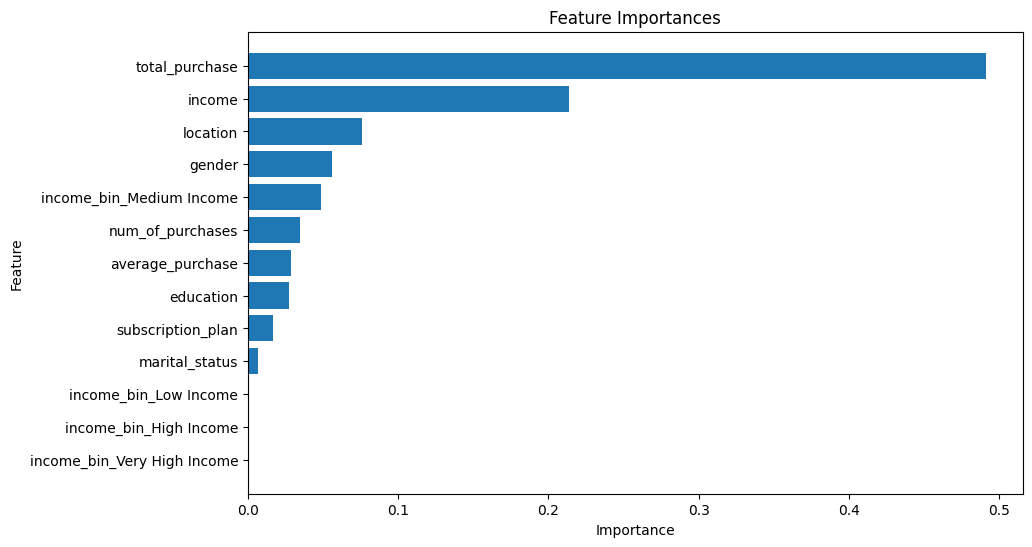

In [34]:
feature_model = final_model.named_steps['decisiontreeclassifier']
feature_importance = feature_model.feature_importances_
feature_names = x_Train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_importance_df['Feature'], sorted_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()

In [35]:
sorted_feature_importance_df.to_csv('./artifacts/feature_importance.csv')

### Creating a prediction function 

In [36]:
def make_predictions(csv_file):
    pred_model = joblib.load('./artifacts/model_2.pkl')

    pred_df = pd.read_csv(csv_file)

    #removing the irrelevent feature
    pred_df.drop(
        columns='CustomerID',
        inplace=True
    )

    num_col = ['Income','NumOfPurchases'] #creating a list of the numeric features with missing values
    cat_col = ['Gender','Location','MaritalStatus'] #creating a list of categorical features with missing values

    for col in num_col: #for each of the columns in the list replace the missing values with the mean of the column
        pred_df[col].fillna(
            pred_df[col]
            .dropna()
            .mean(),
            inplace= True
        )

    for col1 in cat_col:
        pred_df[col1].fillna( #replace the missing categorical values with the mode of the feature
            pred_df[col1]
            .mode()[0],
            inplace= True
        )

    pred_df.drop(
        columns= 'Age',
        inplace= True
    )

    pred_df = clean_columns(pred_df)

    label_enc = LabelEncoder()

    pred_df['gender'] = label_enc.fit_transform(pred_df['gender'])
    pred_df['location'] = label_enc.fit_transform(pred_df['location'])
    pred_df['marital_status'] = label_enc.fit_transform(pred_df['marital_status'])
    pred_df['education'] = label_enc.fit_transform(pred_df['education'])
    pred_df['subscription_plan'] = label_enc.fit_transform(pred_df['subscription_plan'])

    # Bin income into brackets
    bins = [0, 30000, 50000, 70000, float('inf')]
    labels = ['Low Income', 'Medium Income', 'High Income', 'Very High Income']
    pred_df['income_bin'] = pd.cut(pred_df['income'], bins=bins, labels=labels, right=False)

    # Added average feature
    pred_df['average_purchase'] = round(pred_df['total_purchase'] / pred_df['num_of_purchases'],0)

    pred_df['income'] = round(pred_df['income'],0)  

    # Reorder columns
    pred_df = pred_df[['gender', 'income', 'income_bin', 'total_purchase', 'num_of_purchases', 'average_purchase', 'location', 'marital_status', 'education', 'subscription_plan']]

    pred_df = OneHotEncoder(handle_unknown='ignore', use_cat_names=True).fit_transform(pred_df)

    predictions = pred_model.predict(pred_df)

    predictions = np.where(predictions == 1, 'yes', 'no')

    return predictions

In [37]:
test_df = make_predictions('./data/test.csv') #making predictions on test.csv data
np.savetxt('./artifacts/predictions.csv', test_df, delimiter=',', fmt='%s') #saving the predictions to predictions.csv